<a href="https://colab.research.google.com/github/tayfundaldik/ML-Projects/blob/main/TayfunML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df["class"] = ( df["class"] =="g" ).astype(int)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

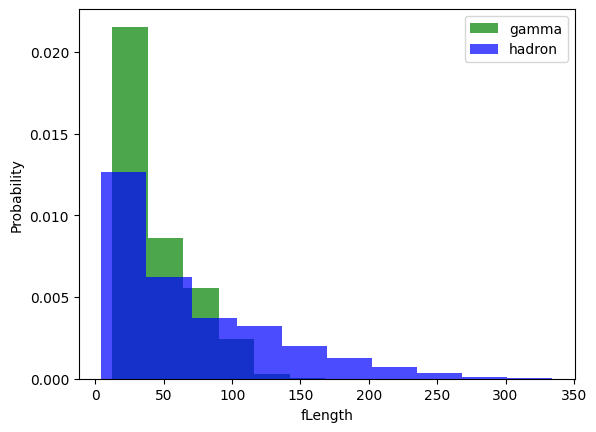

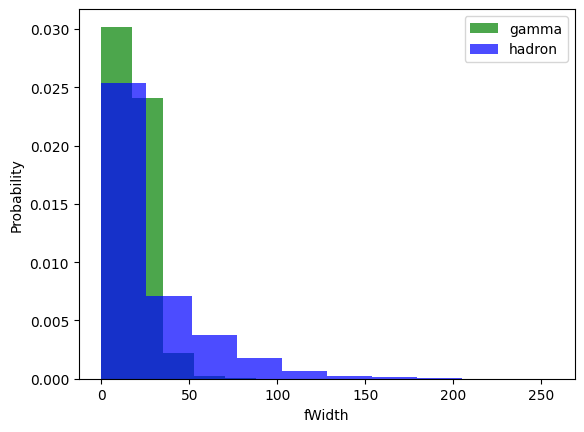

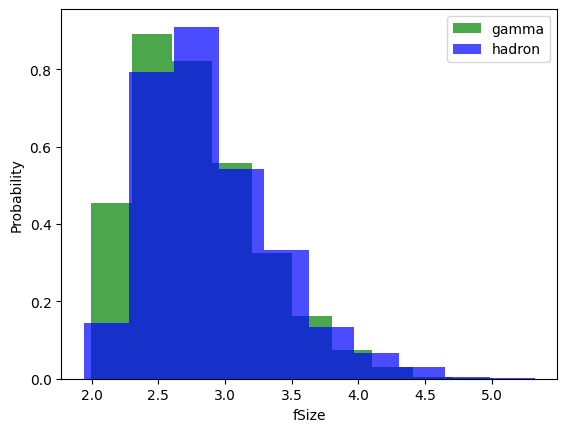

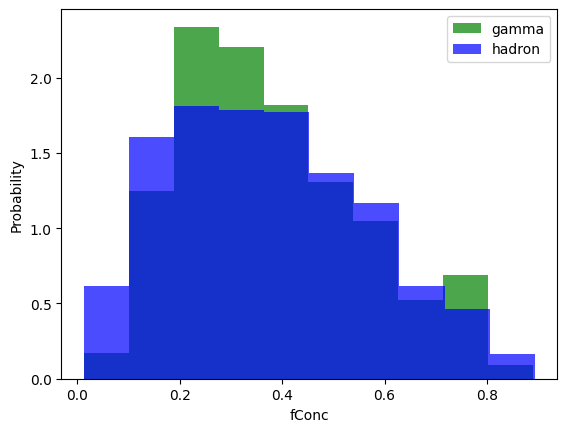

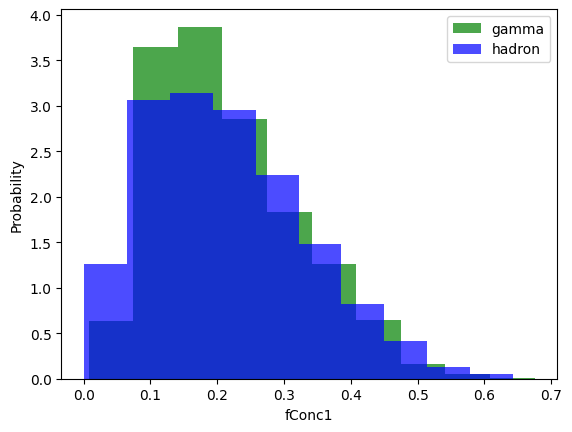

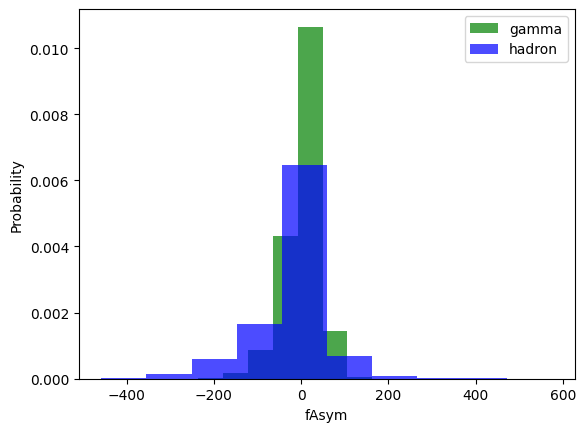

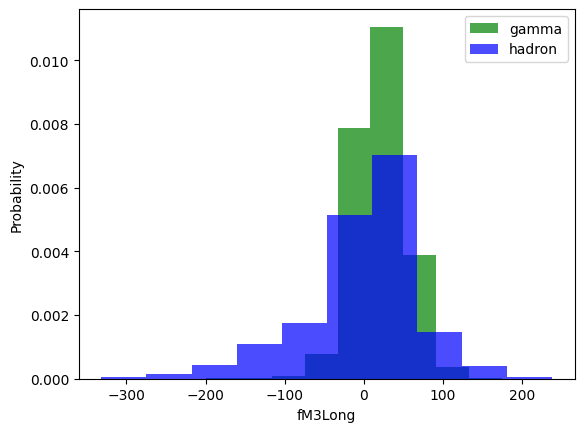

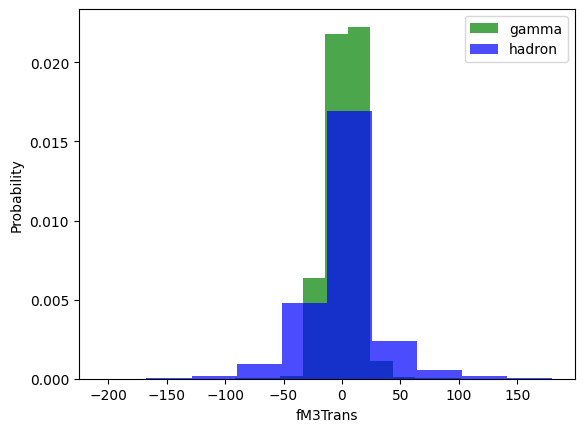

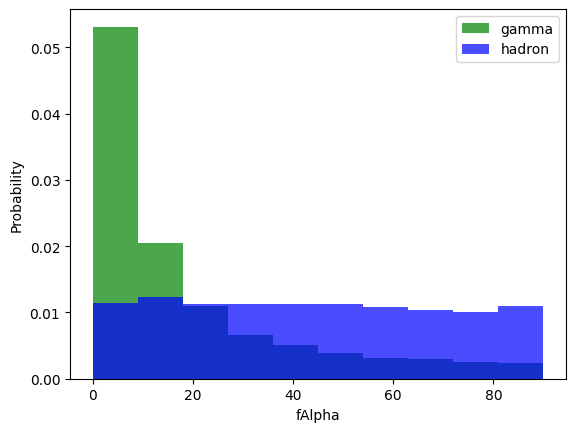

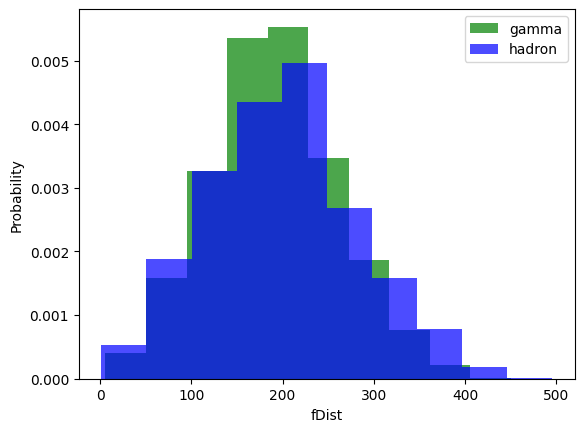

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="green",label="gamma",alpha=0.7,density = True)
  plt.hist(df[df["class"]==0][label],color="blue",label="hadron",alpha=0.7,density = True)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Preparing Data

In [10]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [11]:
def scale_data(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y


In [12]:
train,x_train,y_train = scale_data(train, oversample=True)
valid,x_valid,y_valid = scale_data(valid, oversample=False)
test,x_test,y_test = scale_data(test, oversample=False)

#Learning kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_predict = knn_model.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1357
           1       0.85      0.87      0.86      2447

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1357
           1       0.74      0.90      0.81      2447

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1357
           1       0.84      0.82      0.83      2447

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [20]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1357
           1       0.89      0.90      0.89      2447

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [41]:
def plot_history(history):
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

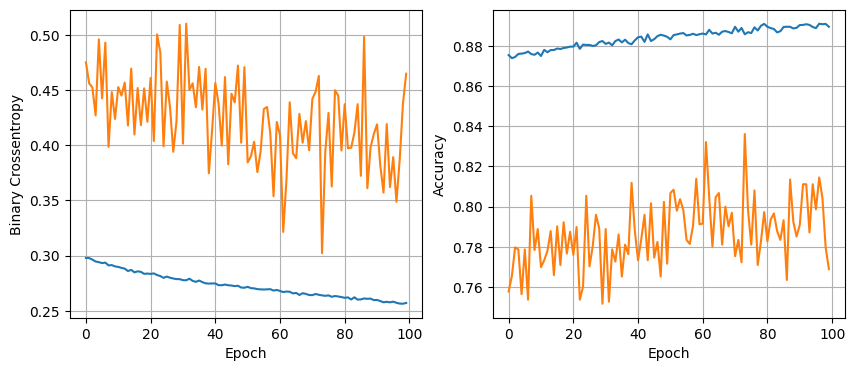

In [42]:
plot_history(history)

In [45]:
import tensorflow as tf
def train_model(x_train,y_train,num_nodes,dropout_prob,batch_size,epochs,lr):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')

  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,verbose=0)
  print('Model Learned!')
  return nn_model,history

16 nodes, 0 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


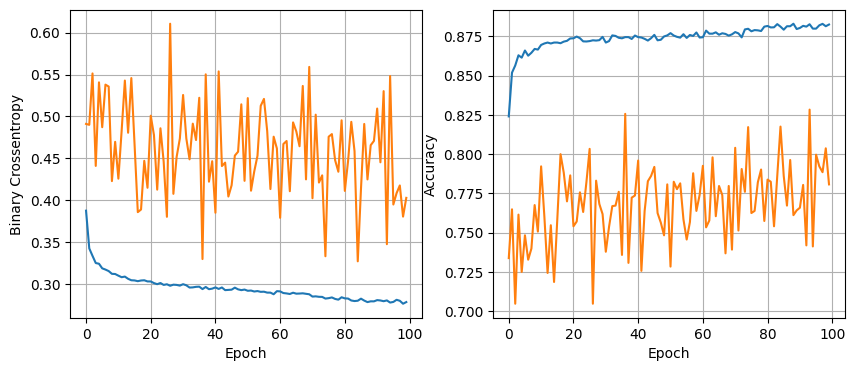

119/119 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.8672
16 nodes, 0 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


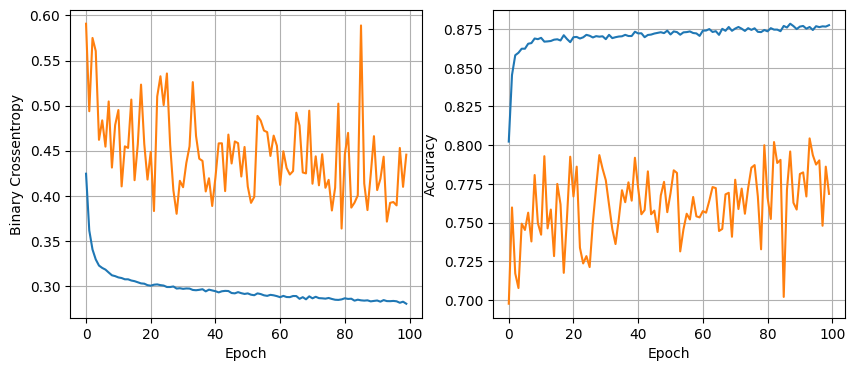

119/119 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8659
16 nodes, 0 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


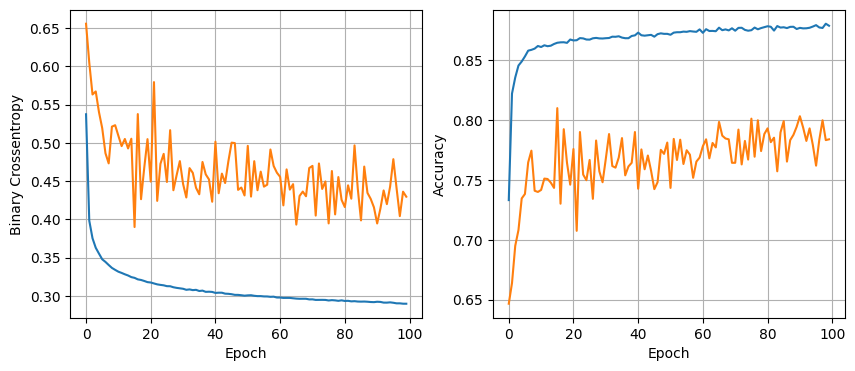

119/119 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8670
16 nodes, 0 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


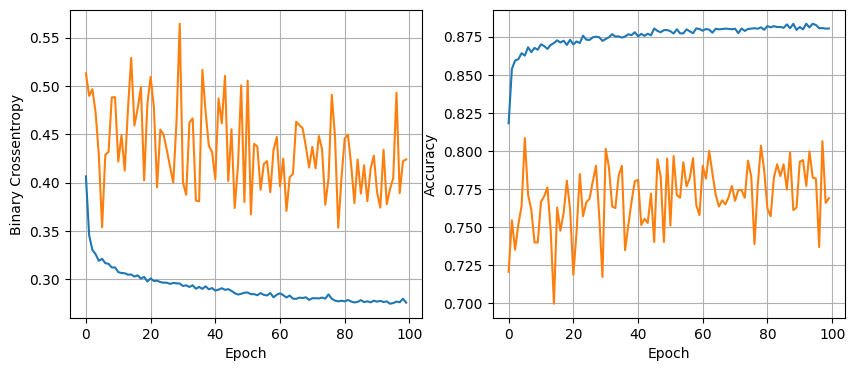

119/119 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8693
16 nodes, 0 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


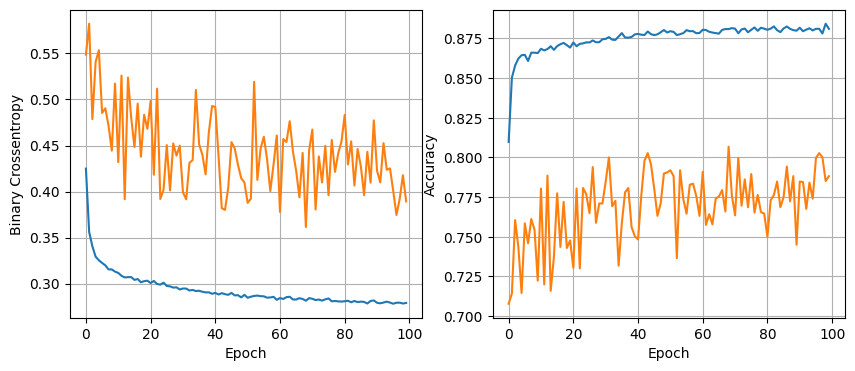

119/119 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8686
16 nodes, 0 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


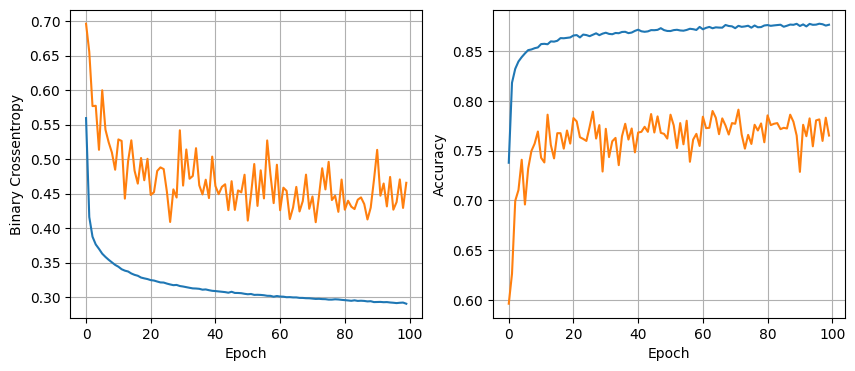

119/119 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8707
16 nodes, 0 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


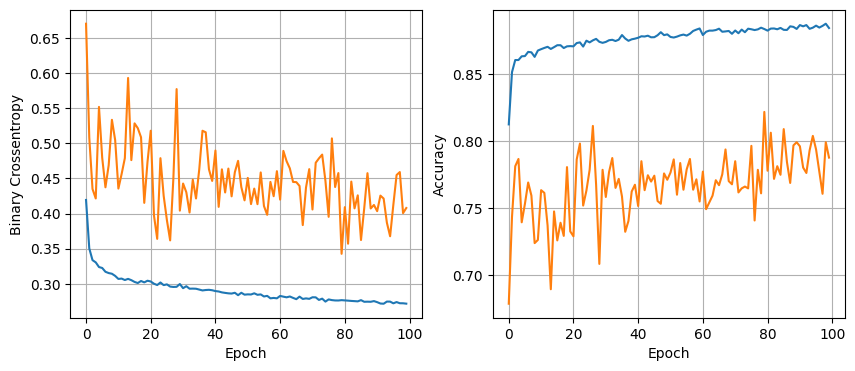

119/119 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8659
16 nodes, 0 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


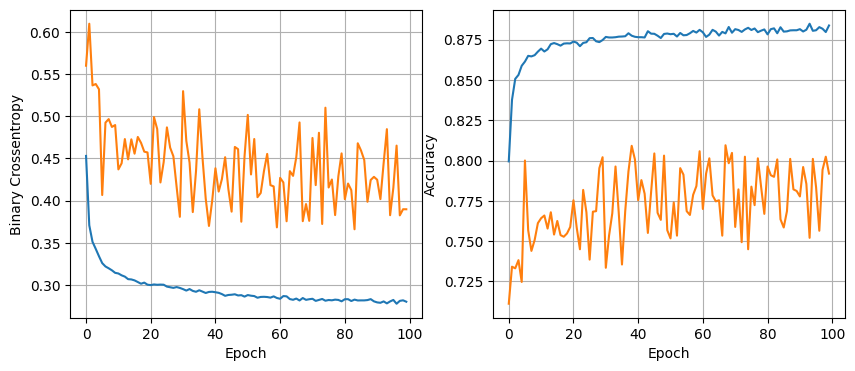

119/119 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8633
16 nodes, 0 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


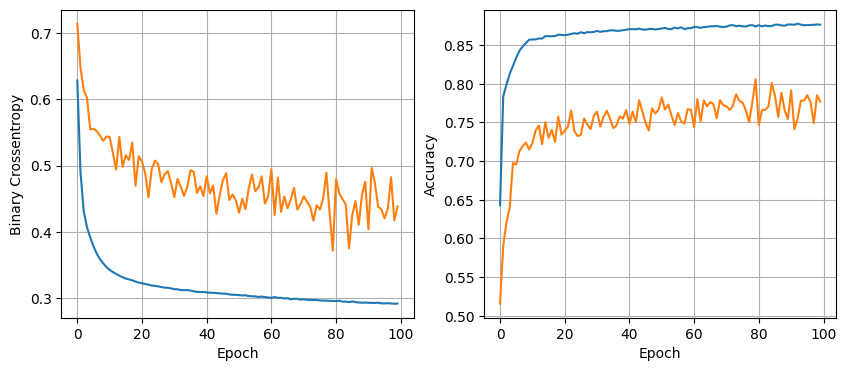

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8707
16 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


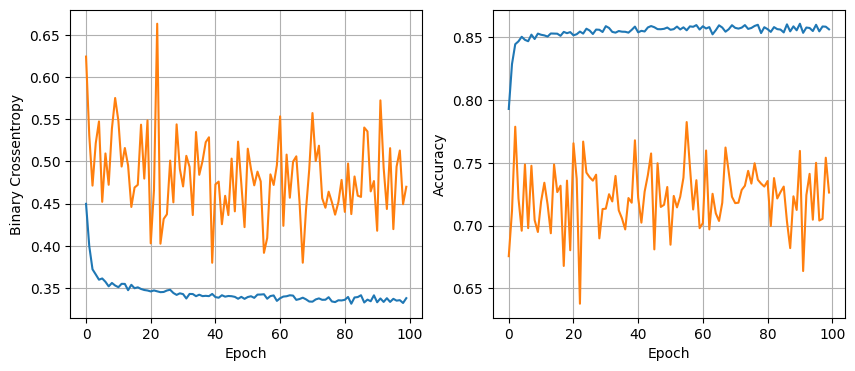

119/119 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8615
16 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


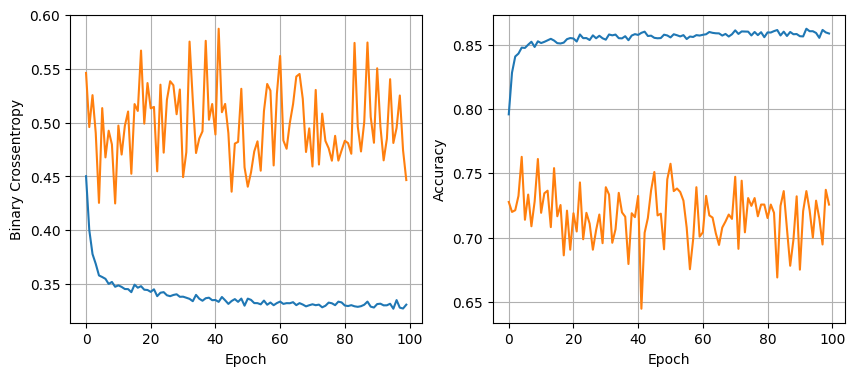

119/119 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8662
16 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


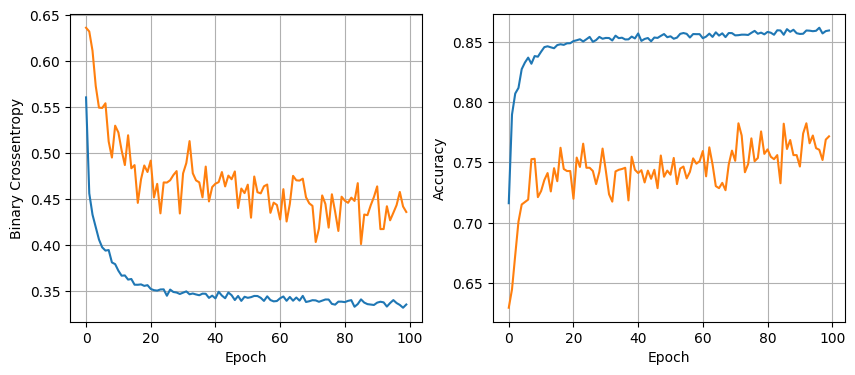

119/119 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8683
16 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


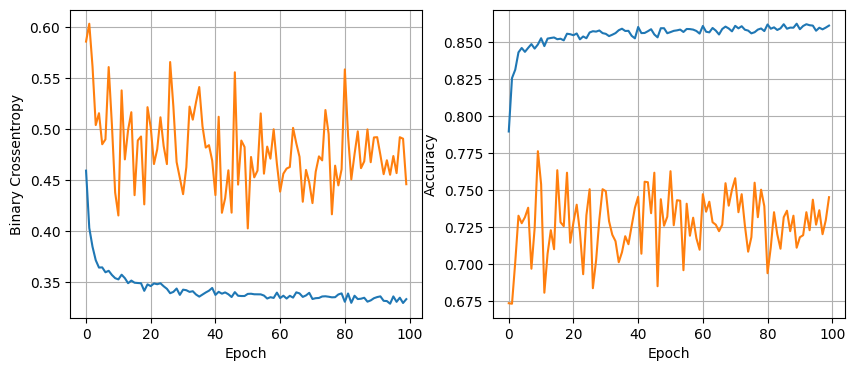

119/119 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8657
16 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


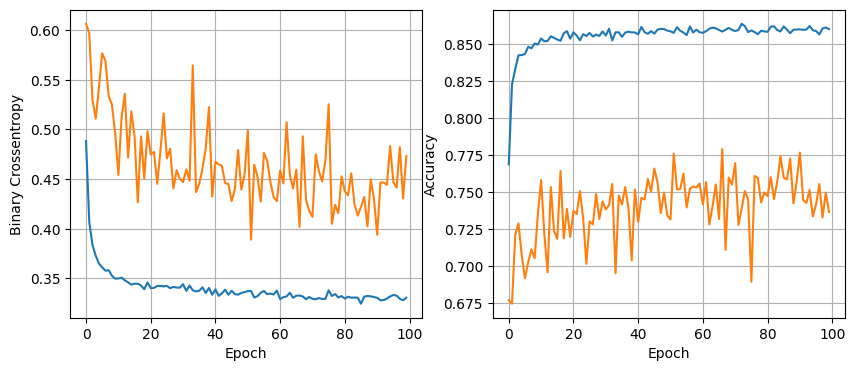

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8688
16 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


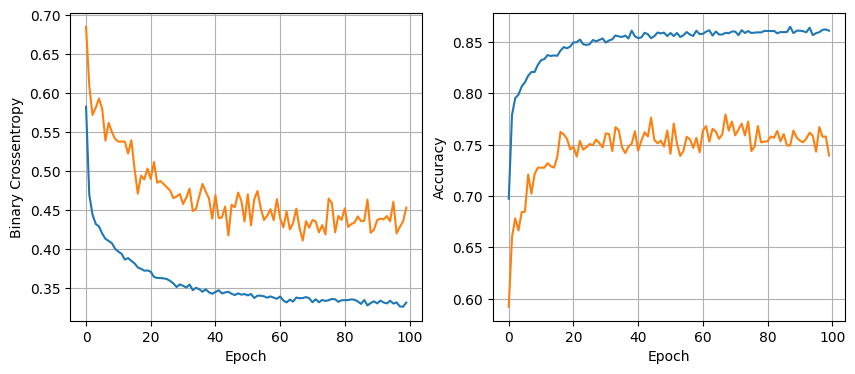

119/119 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8688
16 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


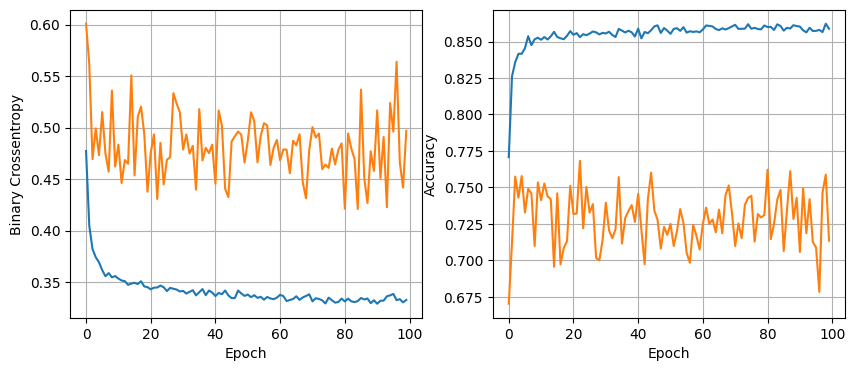

119/119 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8607
16 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


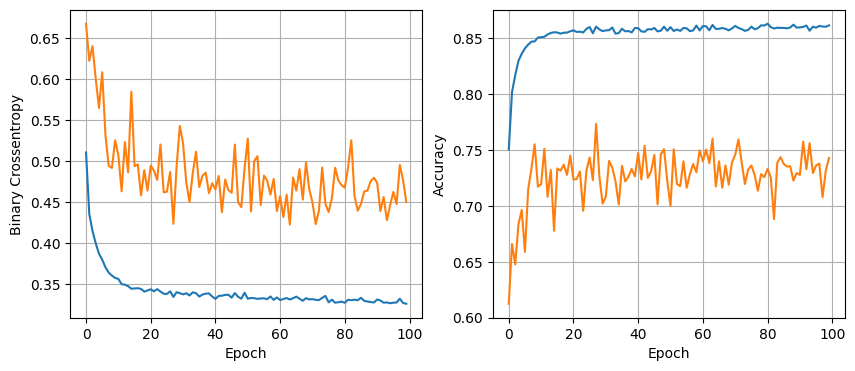

119/119 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8638
16 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


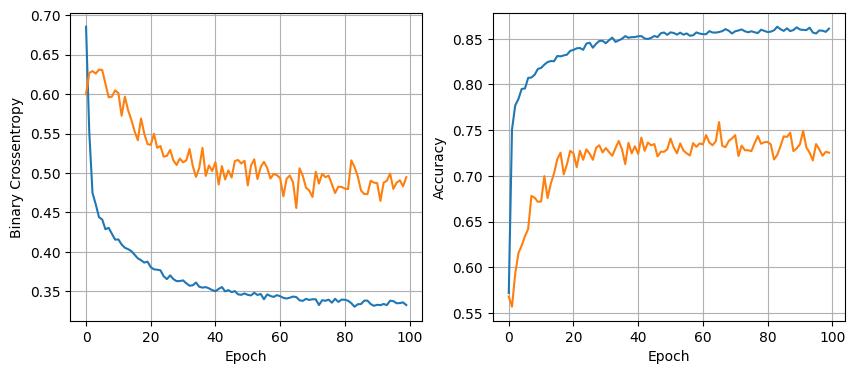

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8693
32 nodes, 0 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


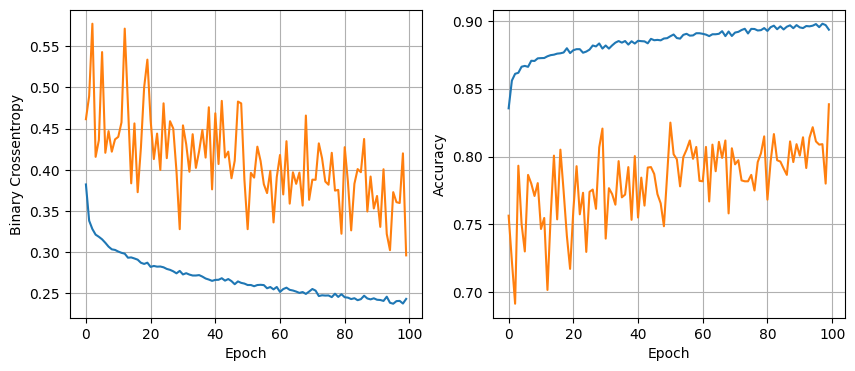

119/119 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8625
32 nodes, 0 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


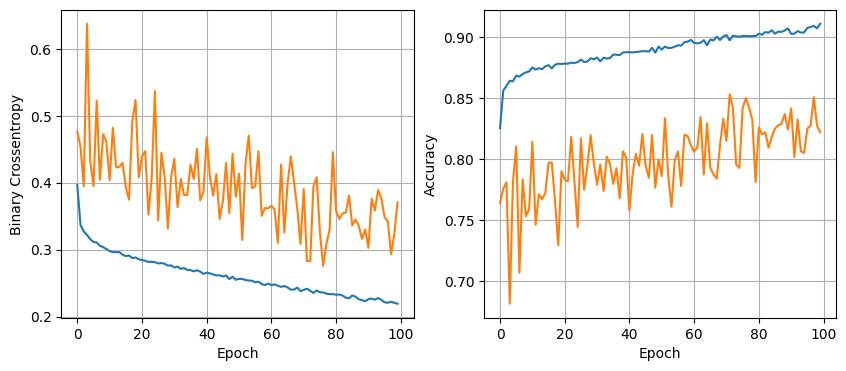

119/119 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8646
32 nodes, 0 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


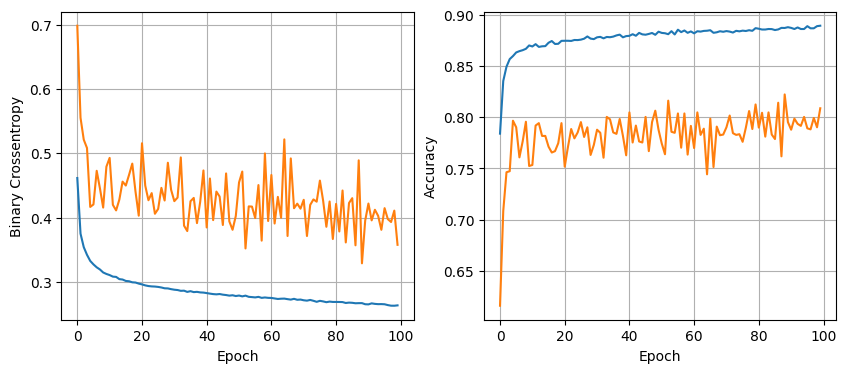

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8665
32 nodes, 0 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


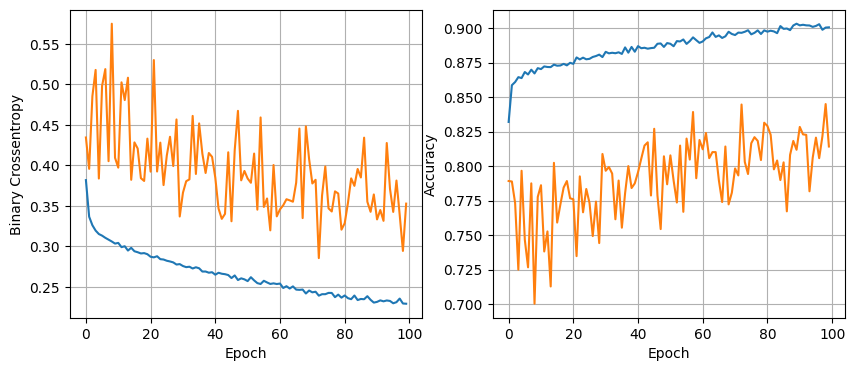

119/119 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8620
32 nodes, 0 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


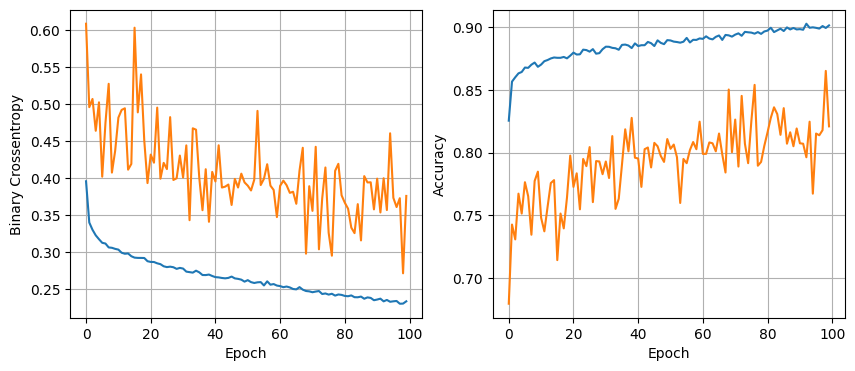

119/119 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8599
32 nodes, 0 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


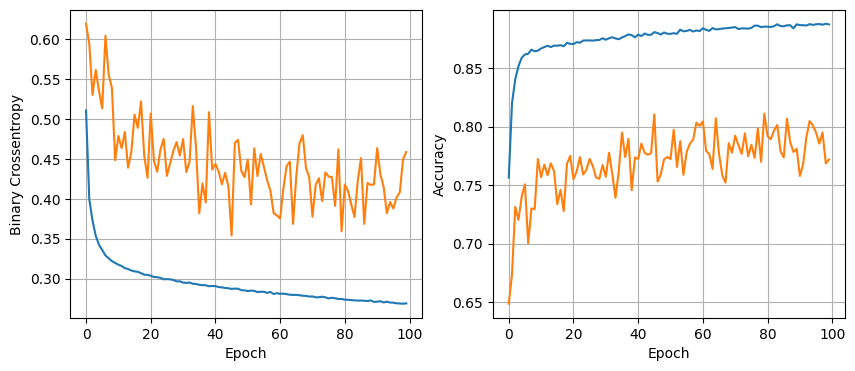

119/119 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8722
32 nodes, 0 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


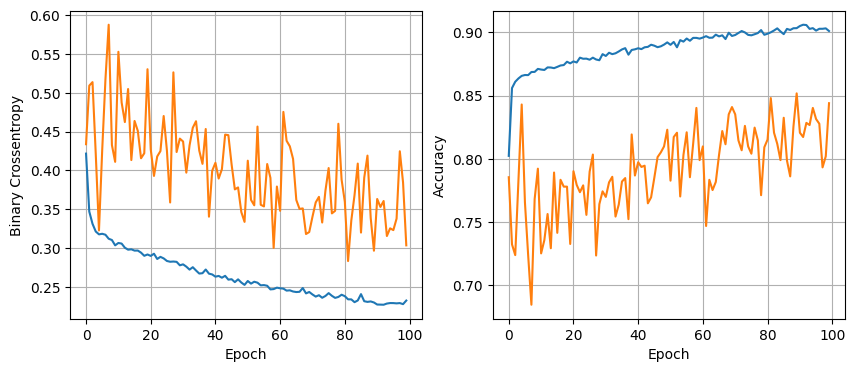

119/119 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8573
32 nodes, 0 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


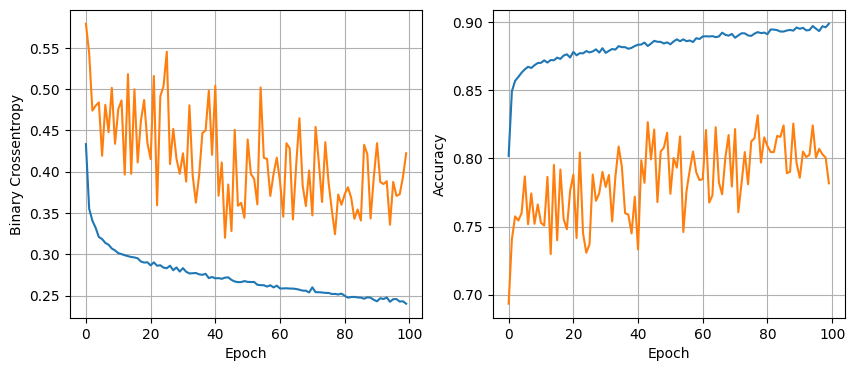

119/119 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8633
32 nodes, 0 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


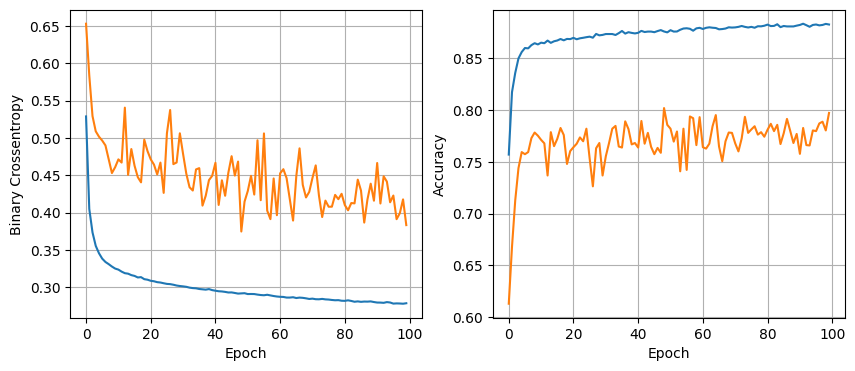

119/119 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8665
32 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


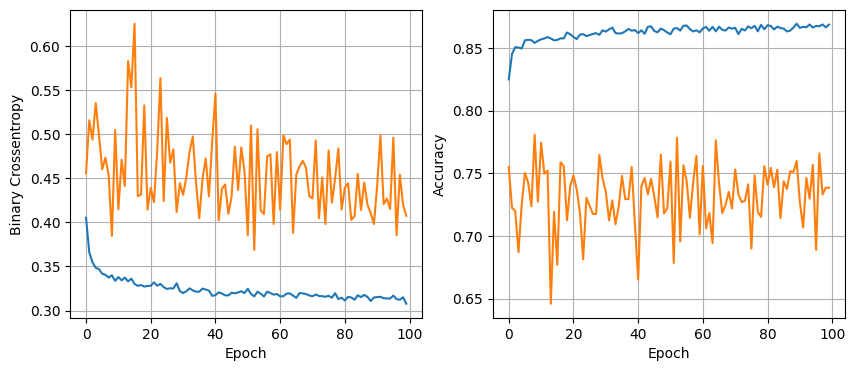

119/119 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8683
32 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


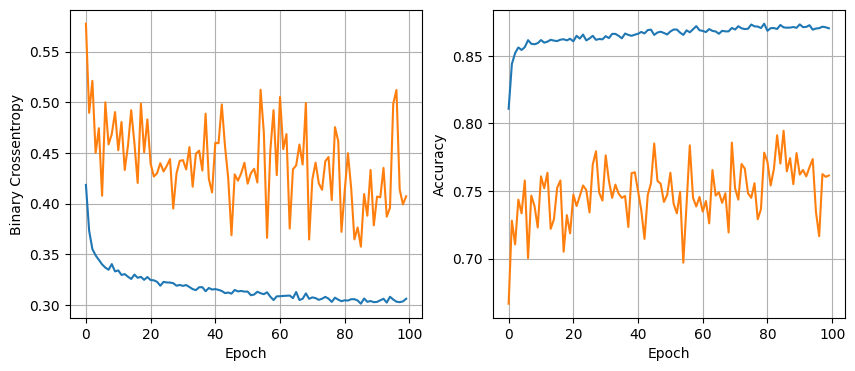

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8730
32 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


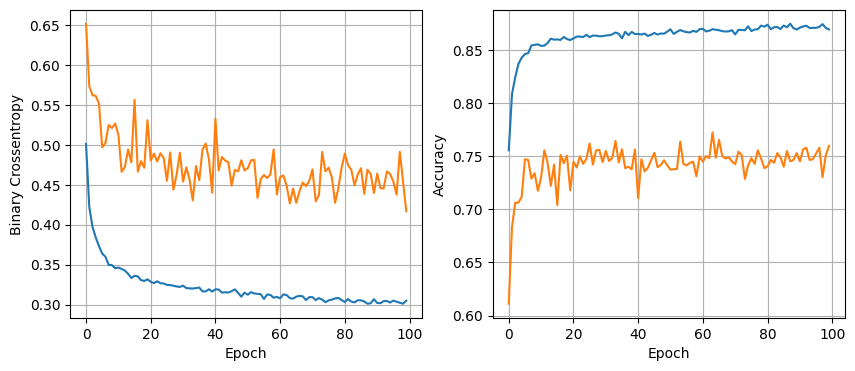

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8717
32 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


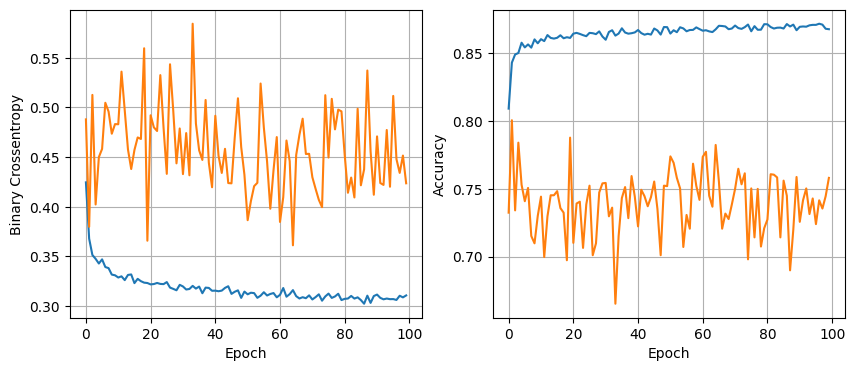

119/119 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8683
32 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


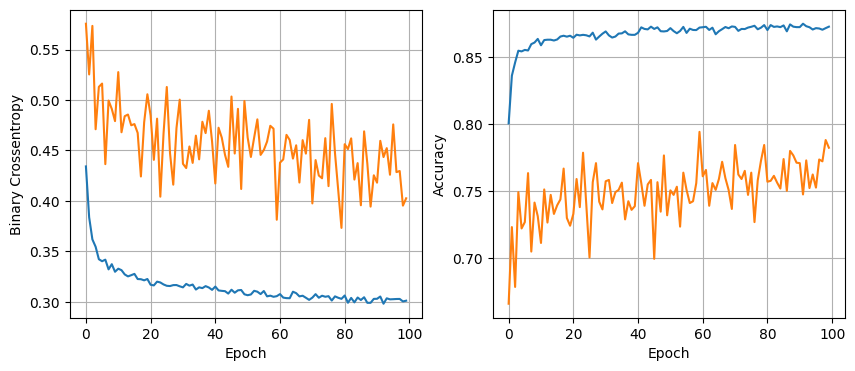

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8707
32 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


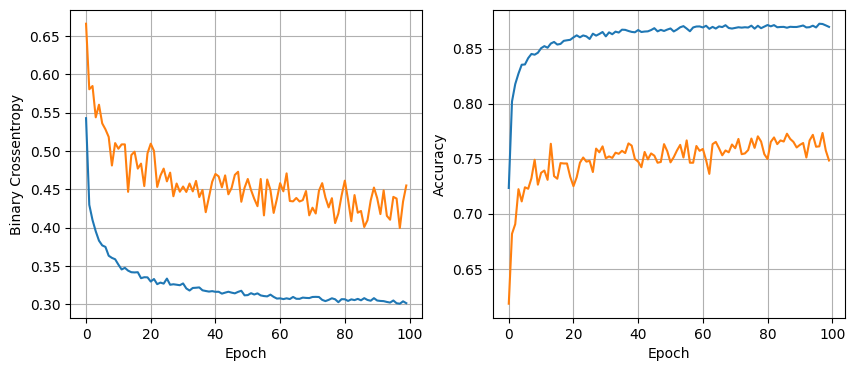

119/119 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8699
32 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


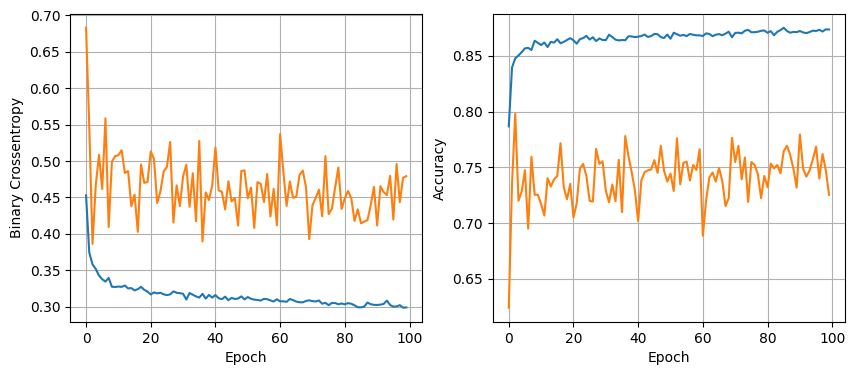

119/119 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8638
32 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


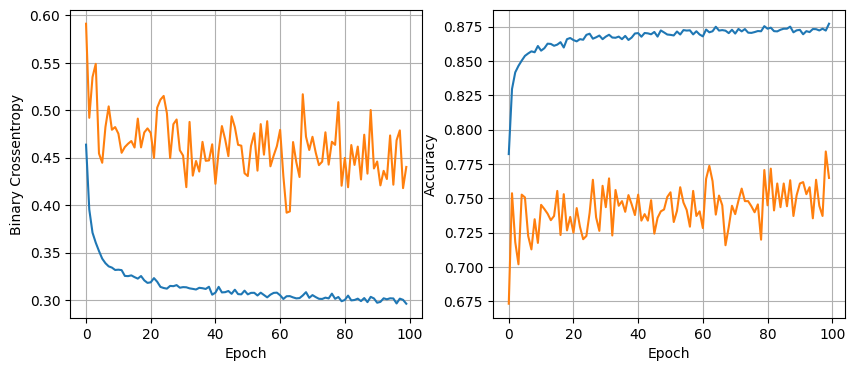

119/119 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8741
32 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


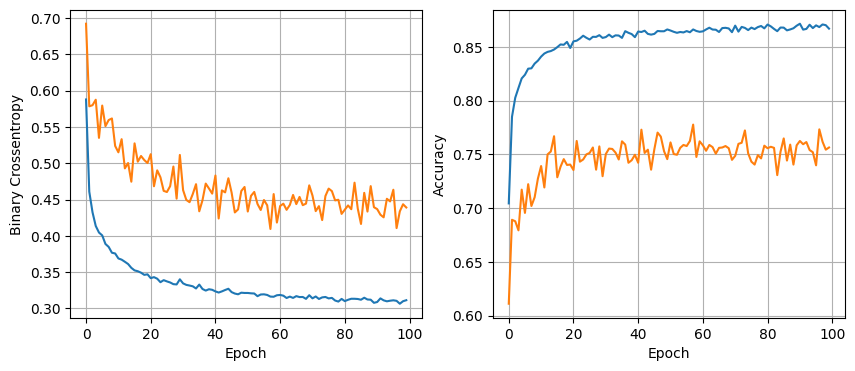

119/119 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8704
64 nodes, 0 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


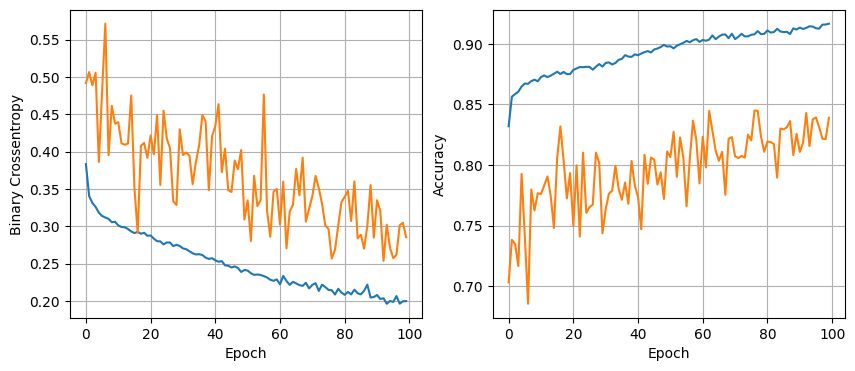

119/119 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8594
64 nodes, 0 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


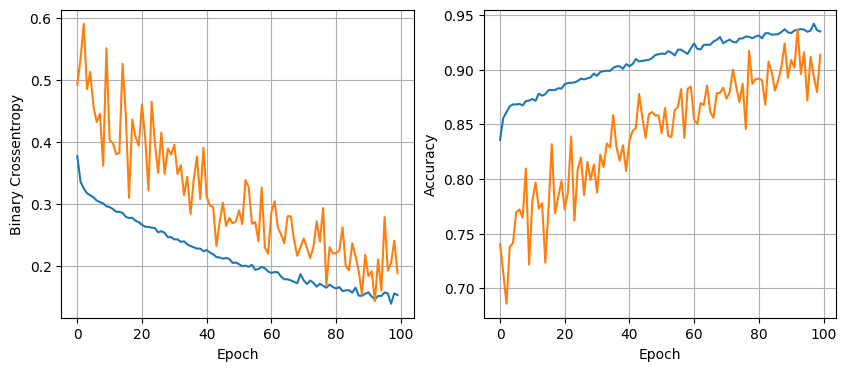

119/119 [==============================] - 0s 2ms/step - loss: 0.7240 - accuracy: 0.8502
64 nodes, 0 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


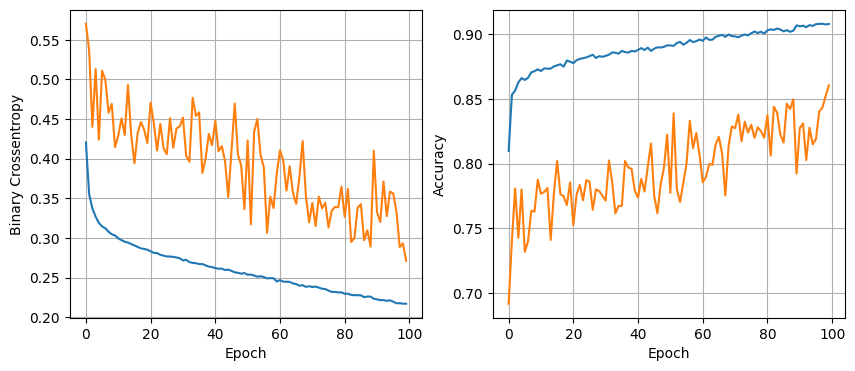

119/119 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8628
64 nodes, 0 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


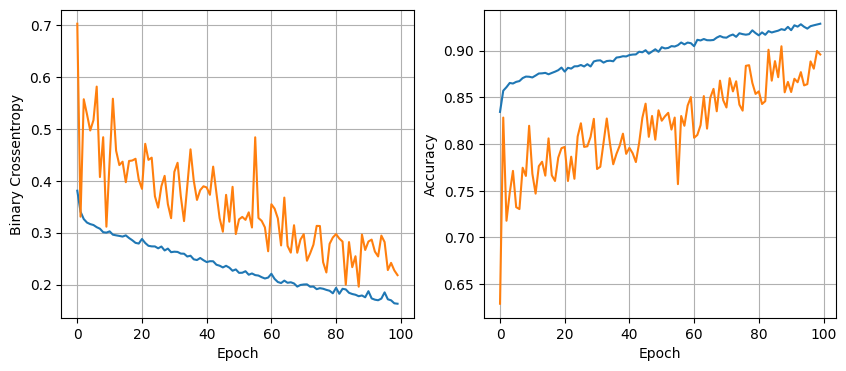

119/119 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.8470
64 nodes, 0 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


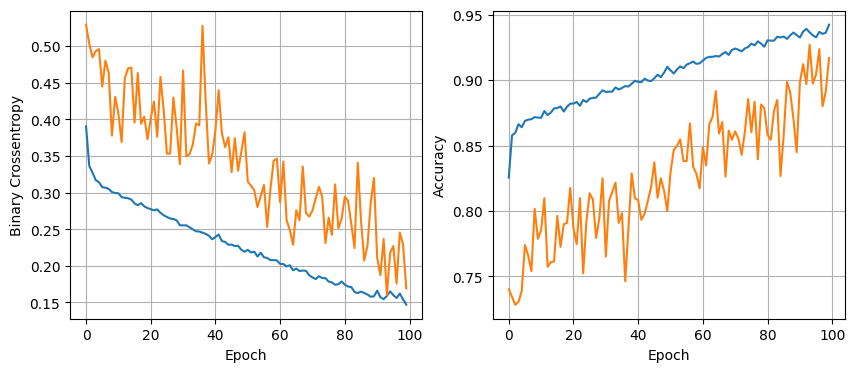

119/119 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.8488
64 nodes, 0 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


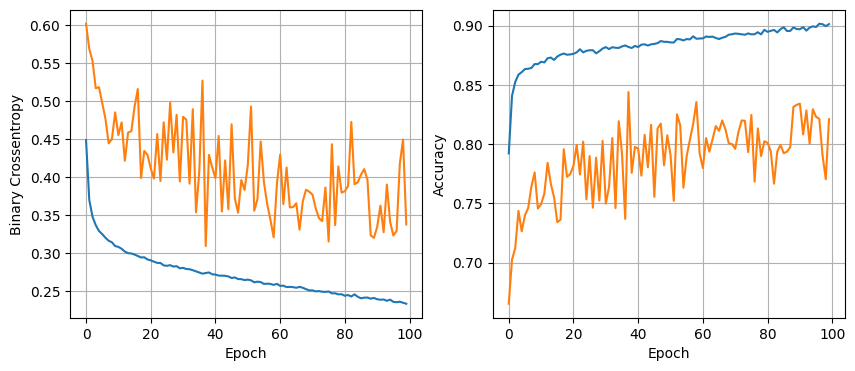

119/119 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8649
64 nodes, 0 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


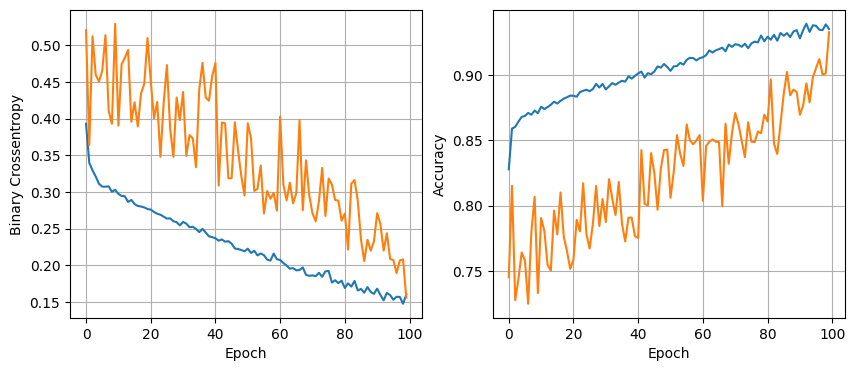

119/119 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.8368
64 nodes, 0 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


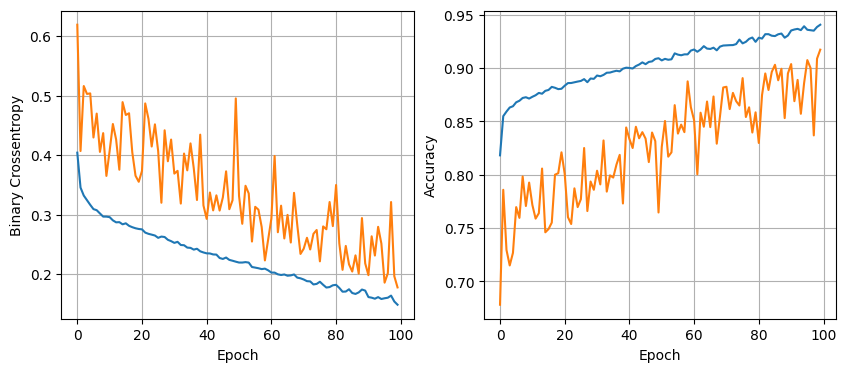

119/119 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.8528
64 nodes, 0 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


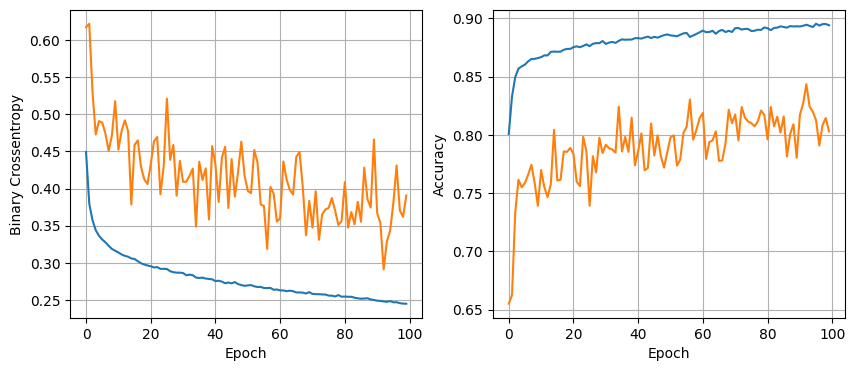

119/119 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8707
64 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


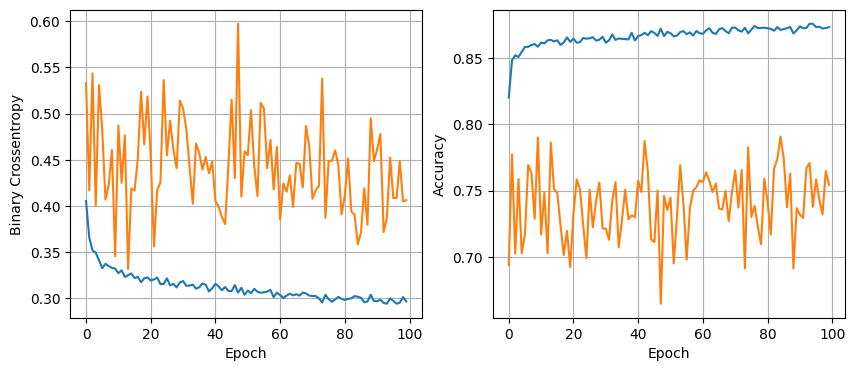

119/119 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8678
64 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


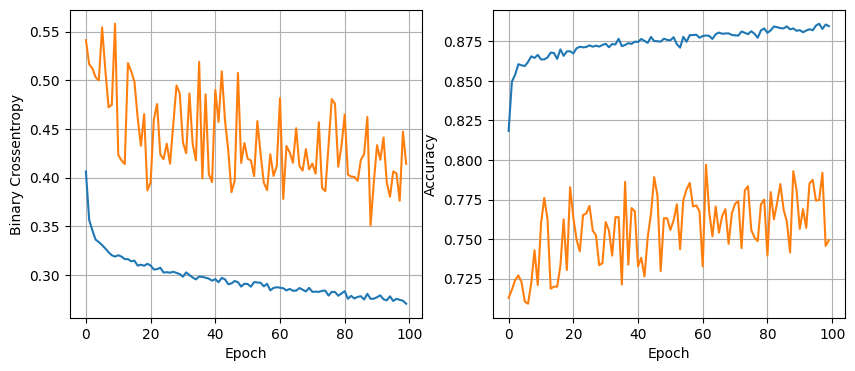

119/119 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8707
64 nodes, 0.2 dropout, 32 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


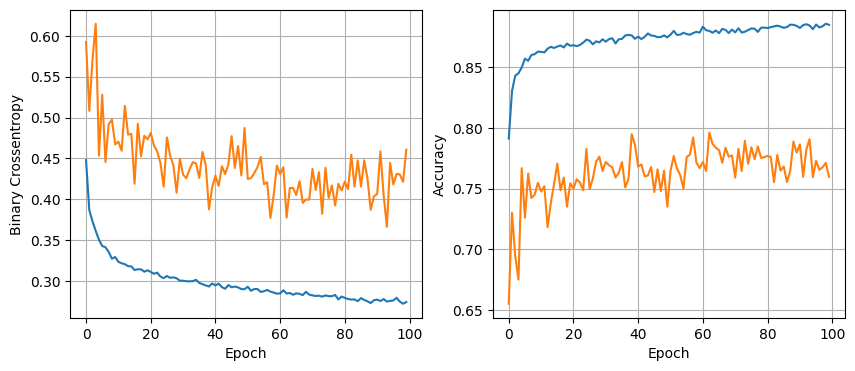

119/119 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.8733
64 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


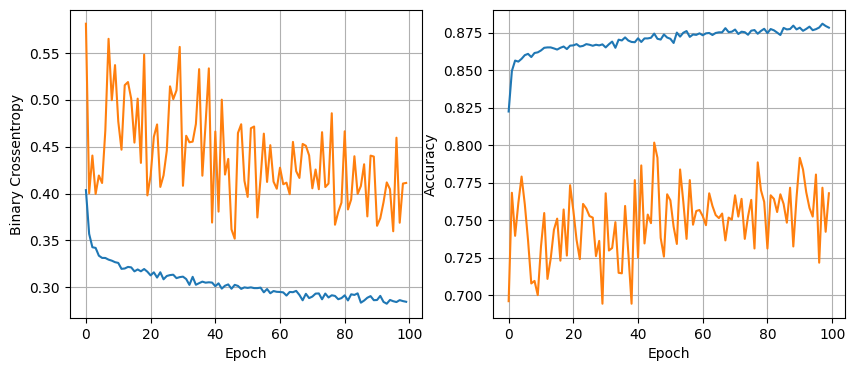

119/119 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8720
64 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


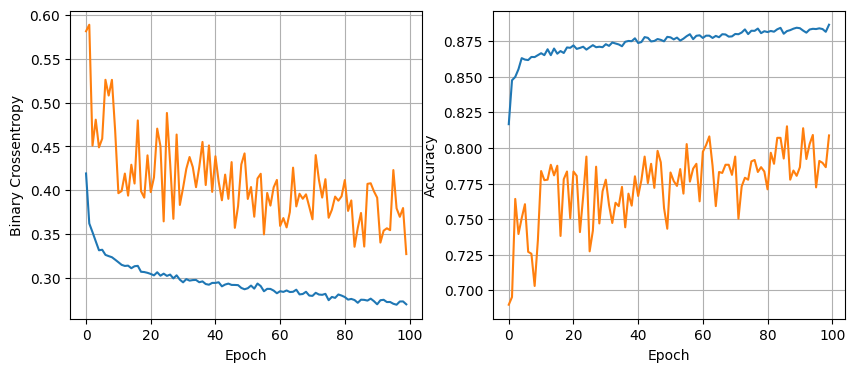

119/119 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8725
64 nodes, 0.2 dropout, 64 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


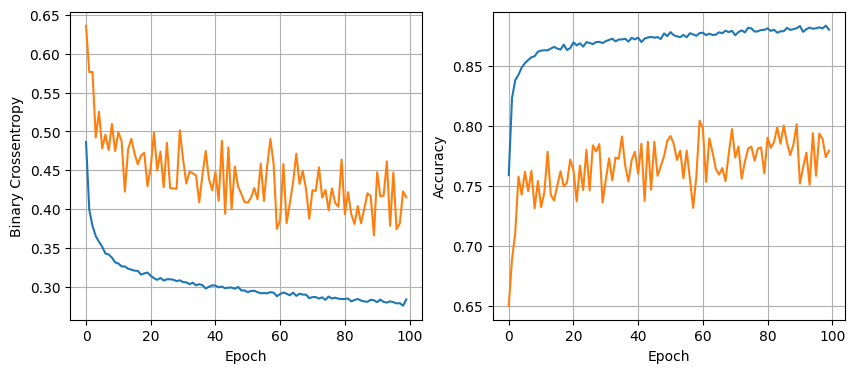

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8746
64 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.01 learning rate 
Model Learned!


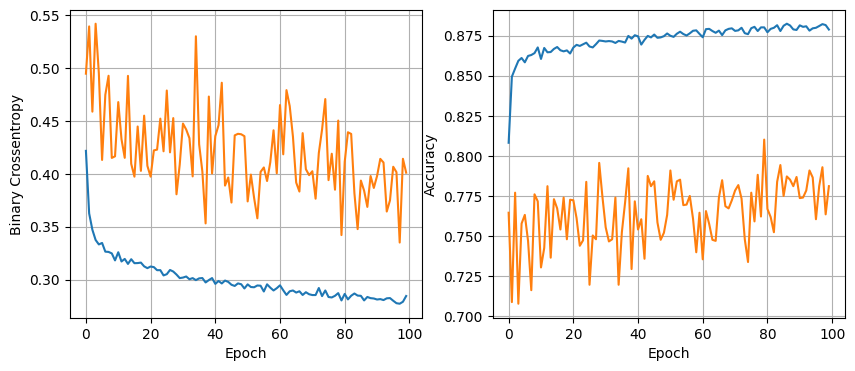

119/119 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8686
64 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.005 learning rate 
Model Learned!


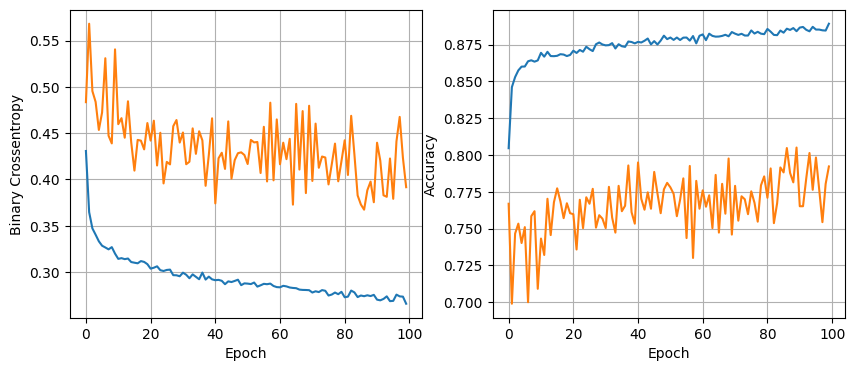

119/119 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8720
64 nodes, 0.2 dropout, 128 batch size, 100 epochs, 0.001 learning rate 
Model Learned!


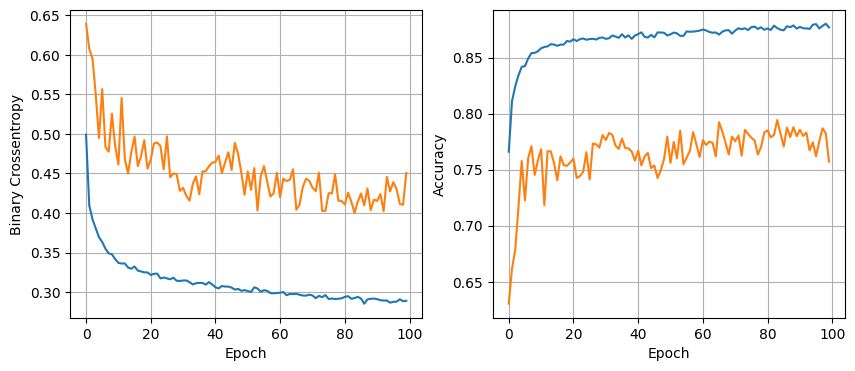

119/119 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8688


In [46]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for batch_size in [32,64,128]:
      for lr in [0.01,0.005,0.001]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout, {batch_size} batch size, {epochs} epochs, {lr} learning rate ")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prob,batch_size,epochs,lr)
        plot_history(history)
        val_loss = model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [47]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1357
           1       0.87      0.95      0.91      2447

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.87      0.87      3804

